Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 9.57 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 13.8 MB/s 
     |████████████████████████████████| 1.8 MB 47.8 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 58.5 MB/s 
     |████████████████████████████████| 181 kB 24.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=6c8cd16043190215fb530d1238f3bd8dbe51869727a203a936962468466b186c
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=671d2e6d0440f5b1d4c576ac2762ca98bb4c8f354faf49a95264348889df56b8
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=1b25284b3086ac991ec7f1297f4855b0e2fb05a2c7dd

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 15:39:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 21:21:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-04 14:10:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-18 12:46:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-17 18:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-24 17:24:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 12:45:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-14 05:57:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-24 01:48:36.jpg  
  inflating: ./datasets/va

In [ ]:
import pathlib
import shutil

name = 'vangogh2photo'
pathlib.Path(f'./datasets/{name}_short/').mkdir(exist_ok=True)
pathlib.Path(f'./datasets/{name}_short/testA/').mkdir(exist_ok=True) 
pathlib.Path(f'./datasets/{name}_short/testB/').mkdir(exist_ok=True) 
pathlib.Path(f'./datasets/{name}_short/trainA/').mkdir(exist_ok=True)
pathlib.Path(f'./datasets/{name}_short/trainB/').mkdir(exist_ok=True)

size=100
for folder in ['testA', 'testB', 'trainA', 'trainB']:
  l = [f for f in pathlib.Path(f'./datasets/{name}/{folder}/').glob('*')][:size]
  for f in l:
    shutil.copy(f, f'./datasets/{name}_short/{folder}/')

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

# WanDB

In [ ]:
import wandb
wandb.login()
wandb.init(
    project='INF8225 - CycleGAN',  # Title of your project
    group='CycleGAN',  # In what group of runs do you want this run to be in?
    name='vangogh_short_1_layer'
)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xavierfc (use `wandb login --relogin` to force relogin)


# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/vangogh2photo_short --name vangogh2photo_short --model cycle_gan --netD n_layers --n_layers_D 1 --use_wandb

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/vangogh2photo_short	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
!python test.py --dataroot datasets/vangogh2photo_short --name vangogh2photo_short --model cycle_gan --netD n_layers --n_layers_D 1 --no_dropout --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/vangogh2photo_short  	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

# Visualize

In [ ]:
!python -m visdom.server -port=8098

/usr/local/lib/python3.7/dist-packages/visdom/server.py:39: DeprecationWarning: zmq.eventloop.ioloop is deprecated in pyzmq 17. pyzmq now works with default tornado and asyncio eventloops.
  ioloop.install()  # Needs to happen before any tornado imports!
Checking for scripts.
It's Alive!
INFO:root:Application Started
You can navigate to http://8634d29efbc3:8098
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/visdom/server.py", line 1922, in <module>
    download_scripts_and_run()
  File "/usr/local/lib/python3.7/dist-packages/visdom/server.py", line 1918, in download_scripts_and_run
    main()
  File "/usr/local/lib/python3.7/dist-packages/visdom/server.py", line 1913, in main
    use_frontend_client_polling=FLAGS.use_frontend_client_polling)
  File "/usr/local/lib/pytho

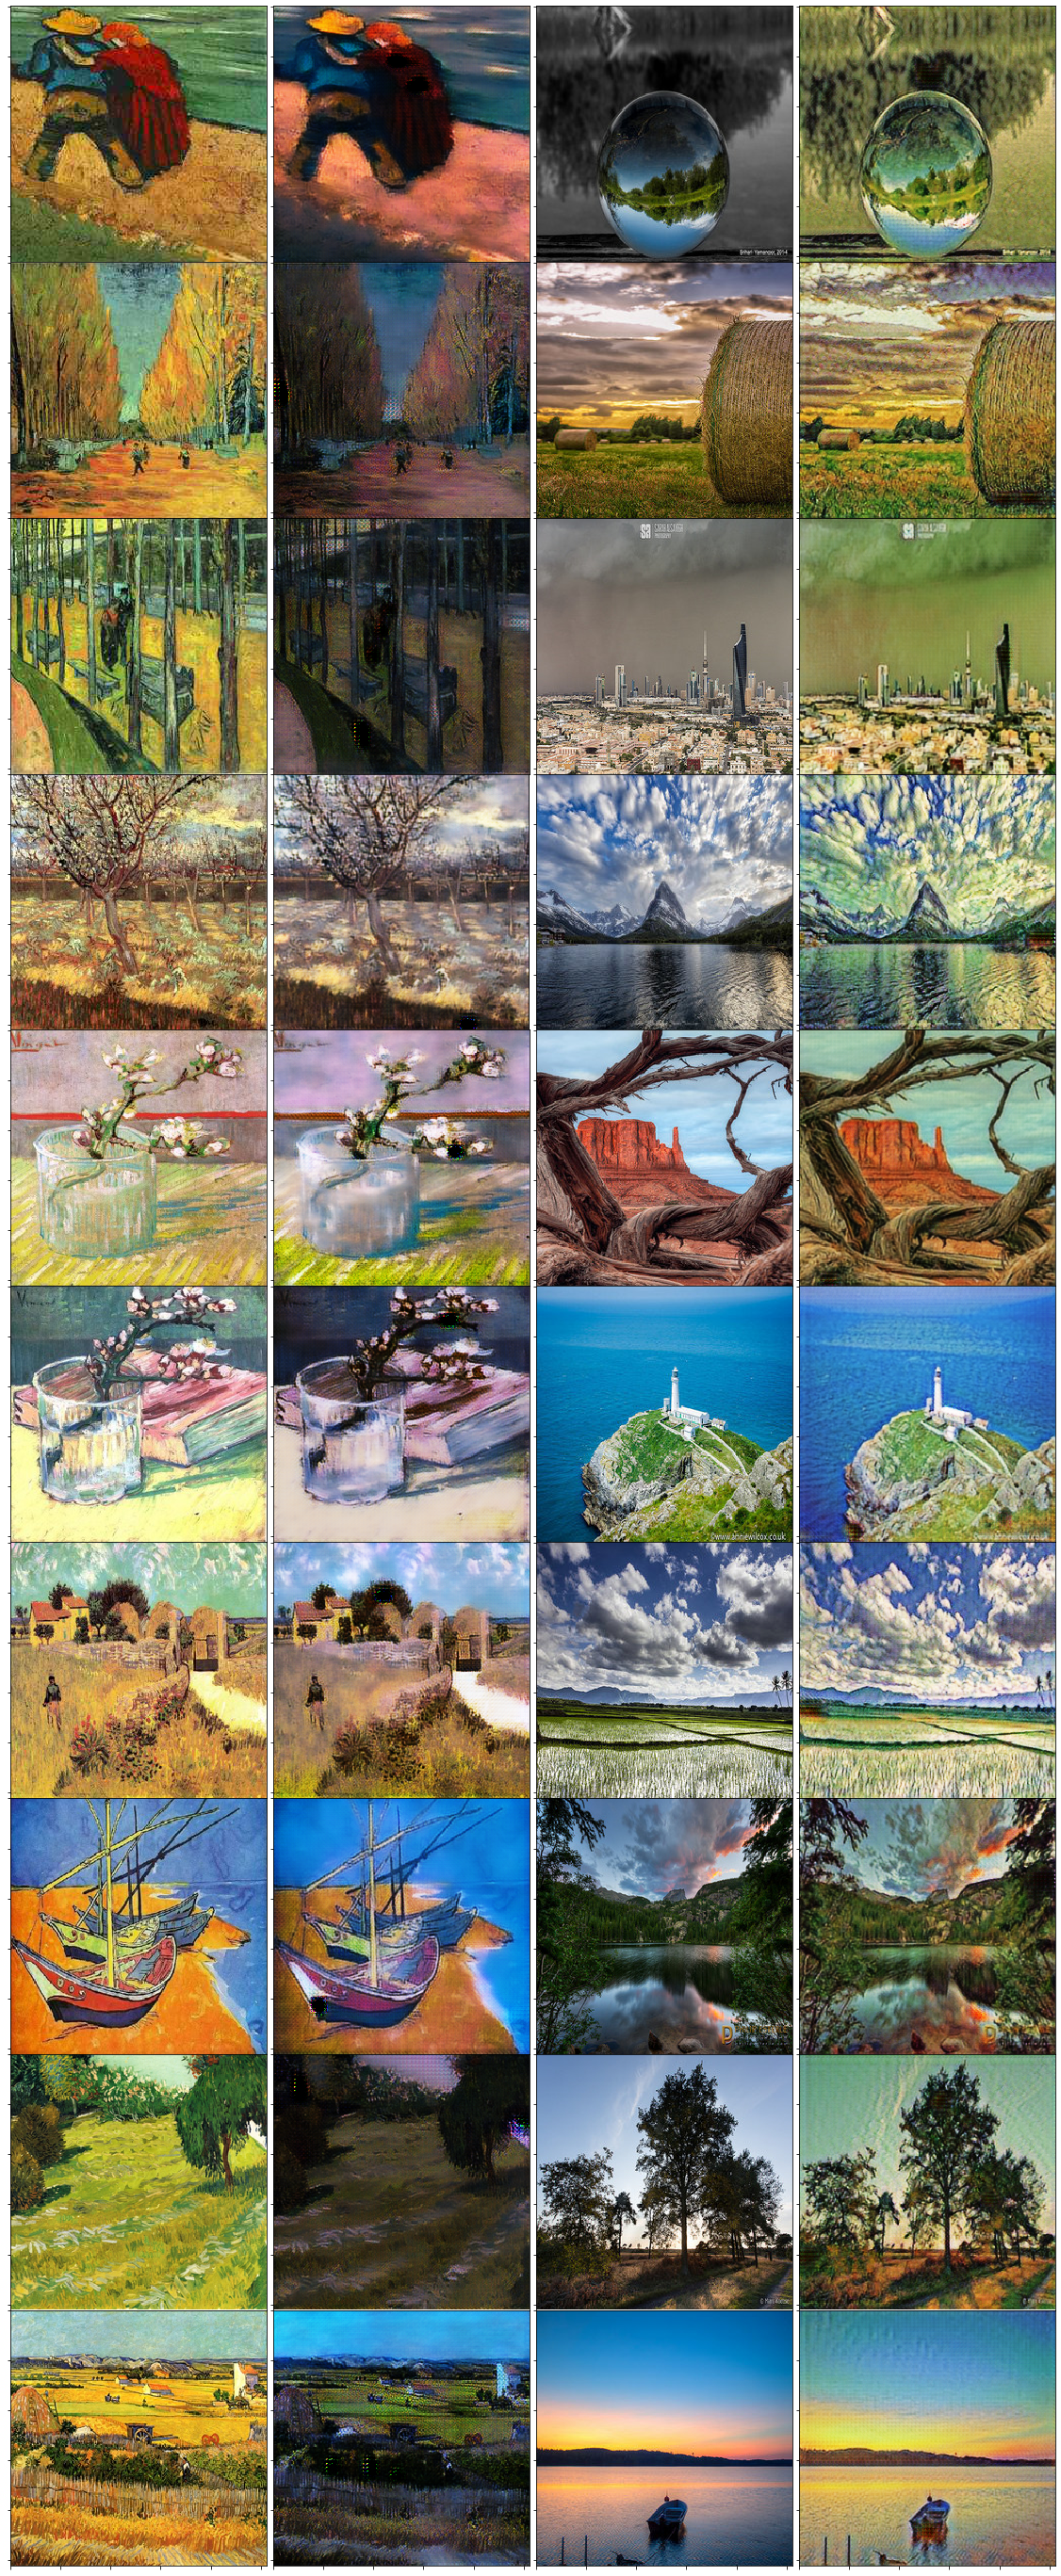

In [ ]:
import matplotlib.pyplot as plt

name_short = name + '_short'
l_fakeA = [f for f in sorted(pathlib.Path(f'./results/{name_short}/test_latest/images/').glob('*fake_A.png'))]
l_realA = [f for f in sorted(pathlib.Path(f'./results/{name_short}/test_latest/images/').glob('*real_A.png'))]
l_fakeB = [f for f in sorted(pathlib.Path(f'./results/{name_short}/test_latest/images/').glob('*fake_B.png'))]
l_realB = [f for f in sorted(pathlib.Path(f'./results/{name_short}/test_latest/images/').glob('*real_B.png'))]
rows = len(l_fakeA)
columns = 4
rows_displayed = 10
images = []
size = 5
fig = plt.figure(figsize=(size * columns, size * rows_displayed))
#fig, ax = plt.subplots(len(l),2)
for i, f in enumerate(l_realA):
  if i < rows_displayed:
    img = plt.imread(str(f))
    images.append(img)
    img = plt.imread(str(l_fakeB[i]))
    images.append(img)
    img = plt.imread(str(l_realB[i]))
    images.append(img)
    img = plt.imread(str(l_fakeA[i]))
    images.append(img)
    index = columns * i
    for offset in range(columns):
      sub = fig.add_subplot(rows_displayed, columns, index + offset + 1)
      sub.set_xticklabels([])
      sub.set_yticklabels([])
      sub.set_aspect('equal')
      sub.imshow(images[index + offset], interpolation='nearest')
    #sub = fig.add_subplot(rows_displayed, columns, index + 2)
    #sub.imshow(images[index + 1], interpolation='nearest')
    #sub.set_xticklabels([])
    #sub.set_yticklabels([])
    #sub.set_aspect('equal')

  #plt.imshow(img)
#plt.imshow(images)
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

#img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
#plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)